a) Extraer atributos a partir de los audios correspondientes a los digitos del 0 al 9. Utilizar el [material suplementario](https://colab.research.google.com/drive/1Yv2SaE529gNIcKd68nAd8LzhFip6vm12?usp=sharing) dado durante la clase de presentación del TP.
- [Colab de extracción del dataset](https://colab.research.google.com/drive/1-2VwDfO-7sYHUrJdnL-oFS9LMEmroXT2)

# Importacion de librerias, archivos y parámetros

In [ ]:
import pandas as pd
import numpy as np
random_state = 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = 'https://raw.githubusercontent.com/NickCis/maestria-dm-datasets/master/tp-2/dataset.csv'
dataset = pd.read_csv(url, index_col = 0)
print(dataset.shape)
dataset.head()

testing = dataset[dataset['type'] == 'testing']
testing.to_csv('/content/testing.csv', header=True, index=True)

In [ ]:
target = 'target'
features = list(filter(lambda x: not (x in [target, 'filename', 'type']), dataset.columns))

['mfcc_0_mean',
 'mfcc_1_mean',
 'mfcc_2_mean',
 'mfcc_3_mean',
 'mfcc_4_mean',
 'mfcc_5_mean',
 'mfcc_6_mean',
 'mfcc_7_mean',
 'mfcc_8_mean',
 'mfcc_9_mean',
 'mfcc_10_mean',
 'mfcc_11_mean',
 'energy_mean',
 'dmfcc_0_mean',
 'dmfcc_1_mean',
 'dmfcc_2_mean',
 'dmfcc_3_mean',
 'dmfcc_4_mean',
 'dmfcc_5_mean',
 'dmfcc_6_mean',
 'dmfcc_7_mean',
 'dmfcc_8_mean',
 'dmfcc_9_mean',
 'dmfcc_10_mean',
 'dmfcc_11_mean',
 'denergy_mean',
 'ddmfcc_0_mean',
 'ddmfcc_1_mean',
 'ddmfcc_2_mean',
 'ddmfcc_3_mean',
 'ddmfcc_4_mean',
 'ddmfcc_5_mean',
 'ddmfcc_6_mean',
 'ddmfcc_7_mean',
 'ddmfcc_8_mean',
 'ddmfcc_9_mean',
 'ddmfcc_10_mean',
 'ddmfcc_11_mean',
 'ddenergy_mean',
 'mfcc_0_std',
 'mfcc_1_std',
 'mfcc_2_std',
 'mfcc_3_std',
 'mfcc_4_std',
 'mfcc_5_std',
 'mfcc_6_std',
 'mfcc_7_std',
 'mfcc_8_std',
 'mfcc_9_std',
 'mfcc_10_std',
 'mfcc_11_std',
 'energy_std',
 'dmfcc_0_std',
 'dmfcc_1_std',
 'dmfcc_2_std',
 'dmfcc_3_std',
 'dmfcc_4_std',
 'dmfcc_5_std',
 'dmfcc_6_std',
 'dmfcc_7_std',
 'dmfc

b) Utilizar la división de datos provista en el dataset para entrenamiento, validación y evaluación de los modelos a desarrollar.

training (18620, 81)
testing (2552, 81)
validation (2494, 81)


one      1892
nine     1875
seven    1875
two      1873
zero     1866
six      1863
eight    1852
five     1844
three    1841
four     1839
Name: target, dtype: int64

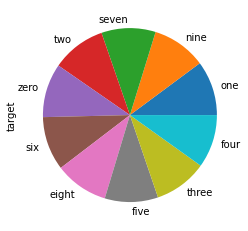

In [ ]:
training = dataset[dataset['type'] == 'training']
testing = dataset[dataset['type'] == 'testing']
validation = dataset[dataset['type'] == 'validation']

print("training", training.shape)
print("testing", testing.shape)
print("validation", validation.shape)
training[target].value_counts().plot.pie()
training[target].value_counts()

c) Entrenar modelos de Naive Bayes, Random Forest y Gradient Boosting Machines para predecir a partir de los atributos acústicos el dígito pronunciado
- [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
- [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

Naive Bayes

0.5282131661442007


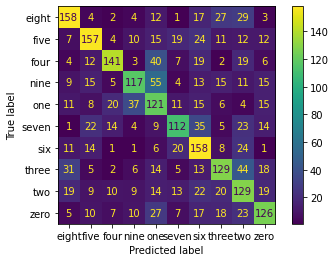

              precision    recall  f1-score   support

       eight       0.62      0.61      0.62       257
        five       0.61      0.58      0.60       271
        four       0.68      0.56      0.61       253
        nine       0.58      0.45      0.51       259
         one       0.39      0.49      0.43       248
       seven       0.56      0.47      0.51       239
         six       0.47      0.65      0.55       244
       three       0.54      0.48      0.51       267
         two       0.41      0.49      0.44       264
        zero       0.55      0.50      0.53       250

    accuracy                           0.53      2552
   macro avg       0.54      0.53      0.53      2552
weighted avg       0.54      0.53      0.53      2552



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

clf_nb = GaussianNB()
clf_nb.fit(training[features], training[target])
clf_nb_y_pred = clf_nb.predict(testing[features])
print(accuracy_score(testing[target], clf_nb_y_pred))

plot_confusion_matrix(clf_nb, testing[features], testing[target], values_format = 'd')
plt.show()
print(classification_report(testing[target], clf_nb_y_pred, zero_division = 0, labels = labels))

Random Forest:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
# Como el dataset esta balanceado vamos a usar accuracy como metrica de perf
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterSampler

# Usamos busqueda de hiperparametros como sugirio Leo
def search_best_params(model, param_distributions, n_iter = 100, random_state = random_state):
    best_score = 0
    best_params = None

    for params in ParameterSampler(param_distributions, n_iter, random_state = random_state):
        clf = model(random_state = random_state, **params)
        clf.fit(training[features], training[target])
        clf_y_pred = clf.predict(validation[features])
        score = accuracy_score(validation[target], clf_y_pred)

        if (score > best_score):
            best_score = score
            best_params = params

    return best_params

# Hacemos una busqueda aleatoria de hiperparametros
param_distributions = {
    'n_estimators': range(50, 200, 5),
    'max_depth': range(1, 6),
    'bootstrap': [True, False]
}

rf_best_params = search_best_params(RandomForestClassifier, param_distributions)


In [ ]:
rf_best_params

{'bootstrap': True, 'max_depth': 5, 'n_estimators': 185}

0.5454545454545454


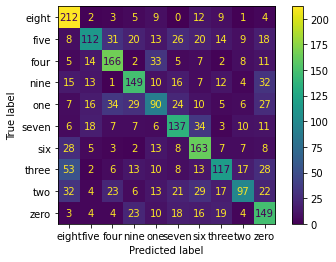

              precision    recall  f1-score   support

       eight       0.57      0.82      0.68       257
        five       0.59      0.41      0.49       271
        four       0.60      0.66      0.63       253
        nine       0.58      0.58      0.58       259
         one       0.43      0.36      0.40       248
       seven       0.52      0.57      0.55       239
         six       0.52      0.67      0.59       244
       three       0.57      0.44      0.50       267
         two       0.60      0.37      0.45       264
        zero       0.48      0.60      0.53       250

    accuracy                           0.55      2552
   macro avg       0.55      0.55      0.54      2552
weighted avg       0.55      0.55      0.54      2552



In [ ]:
clf_rf = RandomForestClassifier(random_state = random_state, **rf_best_params)
clf_rf.fit(training[features], training[target])
clf_rf_y_pred = clf_rf.predict(testing[features])
print(accuracy_score(testing[target], clf_rf_y_pred))
plot_confusion_matrix(clf_rf, testing[features], testing[target], values_format = 'd')
plt.show()
print(classification_report(testing[target], clf_rf_y_pred))

Gradient Boosting Machines:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

param_distributions = {
    'n_estimators': range(20, 200, 5),
    'max_depth': range(1, 7),
    'learning_rate': np.arange(0, 1, 0.001)
}

gb_best_params = search_best_params(GradientBoostingClassifier, param_distributions, n_iter = 10)

In [ ]:
gb_best_params

{'learning_rate': 0.505, 'max_depth': 5, 'n_estimators': 195}

0.7405956112852664


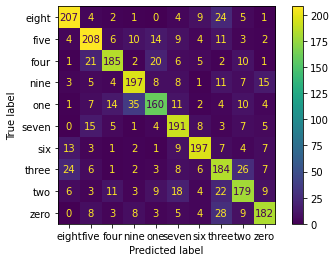

              precision    recall  f1-score   support

       eight       0.80      0.81      0.80       257
        five       0.74      0.77      0.75       271
        four       0.80      0.73      0.76       253
        nine       0.75      0.76      0.76       259
         one       0.72      0.65      0.68       248
       seven       0.71      0.80      0.75       239
         six       0.82      0.81      0.81       244
       three       0.62      0.69      0.65       267
         two       0.69      0.68      0.68       264
        zero       0.78      0.73      0.75       250

    accuracy                           0.74      2552
   macro avg       0.74      0.74      0.74      2552
weighted avg       0.74      0.74      0.74      2552



In [ ]:
clf_gb = GradientBoostingClassifier(random_state = random_state, **gb_best_params)
clf_gb.fit(training[features], training[target])
clf_gb_y_pred = clf_gb.predict(testing[features])
print(accuracy_score(testing[target], clf_gb_y_pred))
plot_confusion_matrix(clf_gb, testing[features], testing[target], values_format = 'd')
plt.show()
print(classification_report(testing[target], clf_gb_y_pred))

Guardo los modelos para no tener que ejecutar todo de nuevo
- [3.4. Model persistence](https://scikit-learn.org/stable/modules/model_persistence.html)

In [ ]:
from joblib import dump

models = {
    'clf_rf': clf_rf,
    'rf_best_params': rf_best_params,
    'gb_best_params': gb_best_params,
    'clf_gb': clf_gb,
    'clf_nb': clf_nb,
}

dump(models, '/content/drive/My Drive/aa-tp2-models.joblib') 

['/content/drive/My Drive/aa-tp2-models.joblib.csv']

Cargo modelos

In [ ]:
from joblib import load
from sklearn.metrics import accuracy_score

!wget "https://github.com/NickCis/maestria-dm-datasets/blob/master/tp-2/models.joblib?raw=true" -O /content/models.joblib
models = load('/content/models.joblib')

y_pred = models['clf_gb'].predict(testing[features])
print(accuracy_score(testing[target], y_pred))

--2020-07-07 15:21:30--  https://github.com/NickCis/maestria-dm-datasets/blob/master/tp-2/models.joblib?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/NickCis/maestria-dm-datasets/raw/master/tp-2/models.joblib [following]
--2020-07-07 15:21:30--  https://github.com/NickCis/maestria-dm-datasets/raw/master/tp-2/models.joblib
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/NickCis/maestria-dm-datasets/master/tp-2/models.joblib [following]
--2020-07-07 15:21:30--  https://raw.githubusercontent.com/NickCis/maestria-dm-datasets/master/tp-2/models.joblib
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.1